# Task1- Iris Flower Classification ML Project

### Import Libraries

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

import sklearn.datasets as iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

## EDA on Iris Dataset

In [53]:
# import the iris dataset
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [54]:
iris.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


## Data Structure

In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


## Check the Columns

In [56]:
iris.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [57]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.columns = columns
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [58]:
iris.duplicated().value_counts()

False    146
True       3
dtype: int64

# Data Shape

In [59]:
print(iris.shape)
rows, cols = iris.shape
print("Number of rows", rows)
print("Number of columns", cols)

(149, 5)
Number of rows 149
Number of columns 5


In [60]:
iris.drop_duplicates(inplace=True)

In [61]:
iris.shape

(146, 5)

In [62]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


## Find missing values

In [63]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


In [64]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [65]:
# percentage calculation of missing values
iris.isnull().sum() / iris.shape[0] * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

## Summary Statistics

In [66]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization

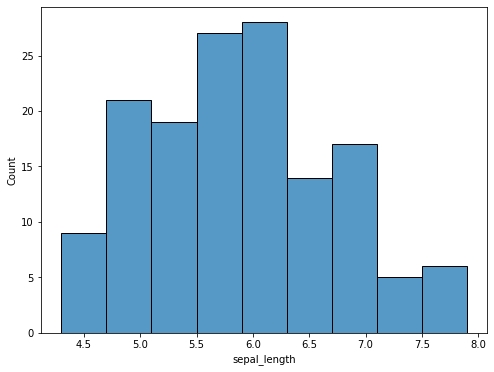

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(iris['sepal_length'])
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

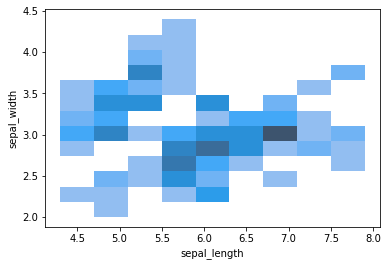

In [68]:
sns.histplot(x='sepal_length', y='sepal_width', data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

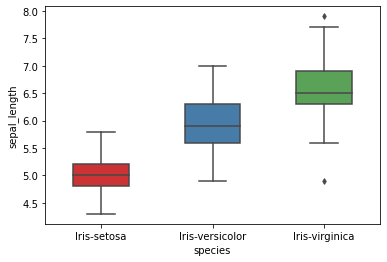

In [69]:
sns.boxplot(x='species', y='sepal_length', data=iris, width=0.5, palette='Set1', fliersize=4)

## Correlation

In [70]:
corr = iris.corr(method='pearson')
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103591,0.870793,0.816015
sepal_width,-0.103591,1.000000,-0.415679,-0.350436
petal_length,0.870793,-0.415679,1.000000,0.961405
petal_width,0.816015,-0.350436,0.961405,1.000000


<AxesSubplot:>

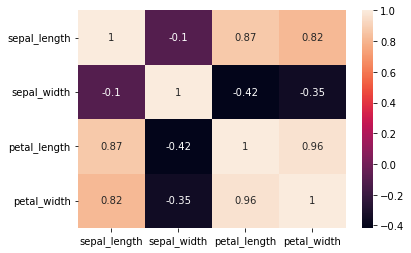

In [71]:
sns.heatmap(corr, annot=True)

## Build the Model

## Defining X and Y

In [72]:
x= iris.drop('species', axis=1)
y = iris['species']

## Split the Dataset into Test and Train

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
47,5.3,3.7,1.5,0.2
99,6.3,3.3,6.0,2.5
27,5.2,3.4,1.4,0.2
19,5.4,3.4,1.7,0.2
44,4.8,3.0,1.4,0.3


In [75]:
y_test.head()

47       Iris-setosa
99    Iris-virginica
27       Iris-setosa
19       Iris-setosa
44       Iris-setosa
Name: species, dtype: object

In [76]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.4,3.9,1.7,0.4
26,5.2,3.5,1.5,0.2
125,6.2,2.8,4.8,1.8
130,7.9,3.8,6.4,2.0
16,5.1,3.5,1.4,0.3


In [77]:
y_train.head()

4         Iris-setosa
26        Iris-setosa
125    Iris-virginica
130    Iris-virginica
16        Iris-setosa
Name: species, dtype: object

## Shape of splitted data

In [84]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (116, 4)
X_test: (30, 4)
Y_train: (116,)
Y_test: (30,)


## Fit the Model

In [85]:
model = []
model.append(('SVC', SVC(gamma='auto')))

In [86]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)

SVC(gamma='auto')

## Predict the Model

In [87]:
pred =model.predict(x_test)

## Accuracy Score

In [88]:
print("Accuracy score:", accuracy_score(y_test, pred))

Accuracy score: 0.9333333333333333


## Classification Report

In [89]:
print("Classification report:", classification_report(y_test, pred))

Classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30

